In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os 
import pandas as pd
from glob import glob

In [2]:


file_paths = glob("C:/Users/yoyo/Nanyang Technological University/FYP_wang xiaoni/Site 02 - 00 - NTU - N3.2-B02-01m - Origin Node/*.csv")

merged_data = pd.DataFrame()

for file_path in file_paths:
    data = pd.read_csv(file_path, header = None)
    merged_data = pd.concat([merged_data, data], ignore_index=True)

merged_data.to_csv("merged_data.csv", index=False)


In [3]:
df = merged_data

In [4]:
temp_time = df[[5, 7, 9, 13, 15, 17]]
column_mapping = {
    5: 'year',
    7: 'month',
    9: 'day',
    13: 'hour',
    15: 'minute',
    17: 'second',
}

temp_time.rename(columns=column_mapping, inplace=True)


In [5]:
datetime_series = pd.to_datetime(temp_time)
df['datetime'] = datetime_series

In [6]:
columns_to_drop = [4, 5, 6, 7, 8,9,12,13,14,15,16,17]  

df.drop(columns=columns_to_drop, inplace=True)

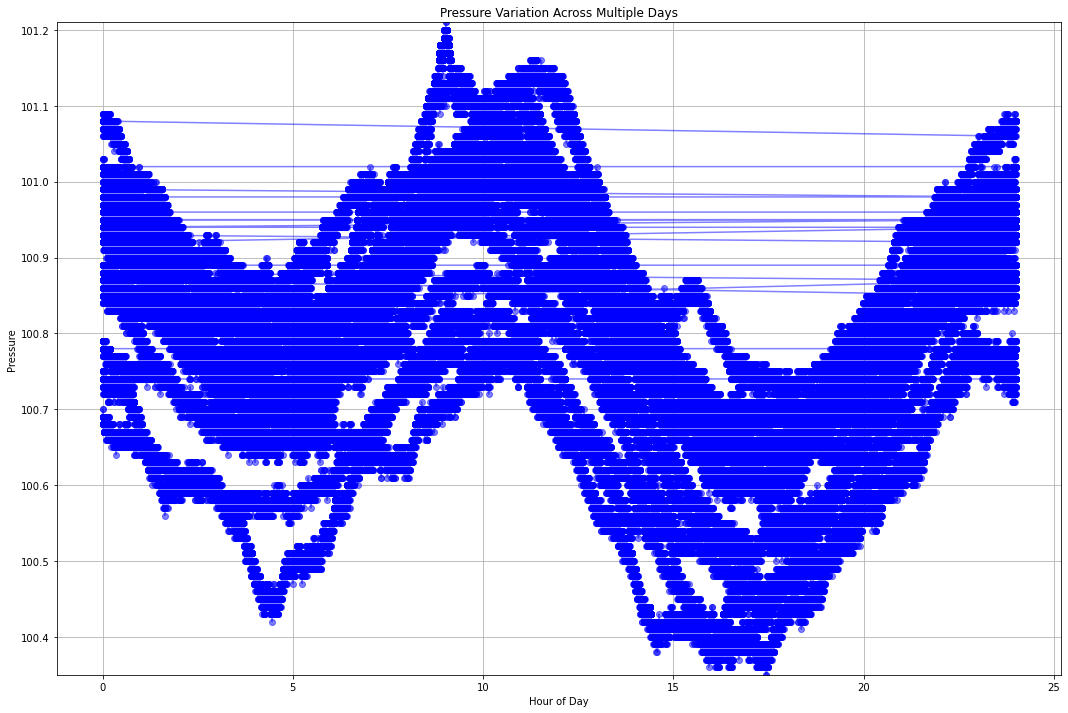

In [7]:
import matplotlib.pyplot as plt
import pandas as pd



plt.figure(figsize=(18, 12))

plt.plot(df['datetime'].dt.hour + df['datetime'].dt.minute / 60 + df['datetime'].dt.second / 3600,
         df[19], marker='o', linestyle='-', color='b', alpha=0.5)

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Pressure Variation Across Multiple Days')
plt.grid(True)
plt.ylim(df[19].min(), df[19].max())  
plt.show()


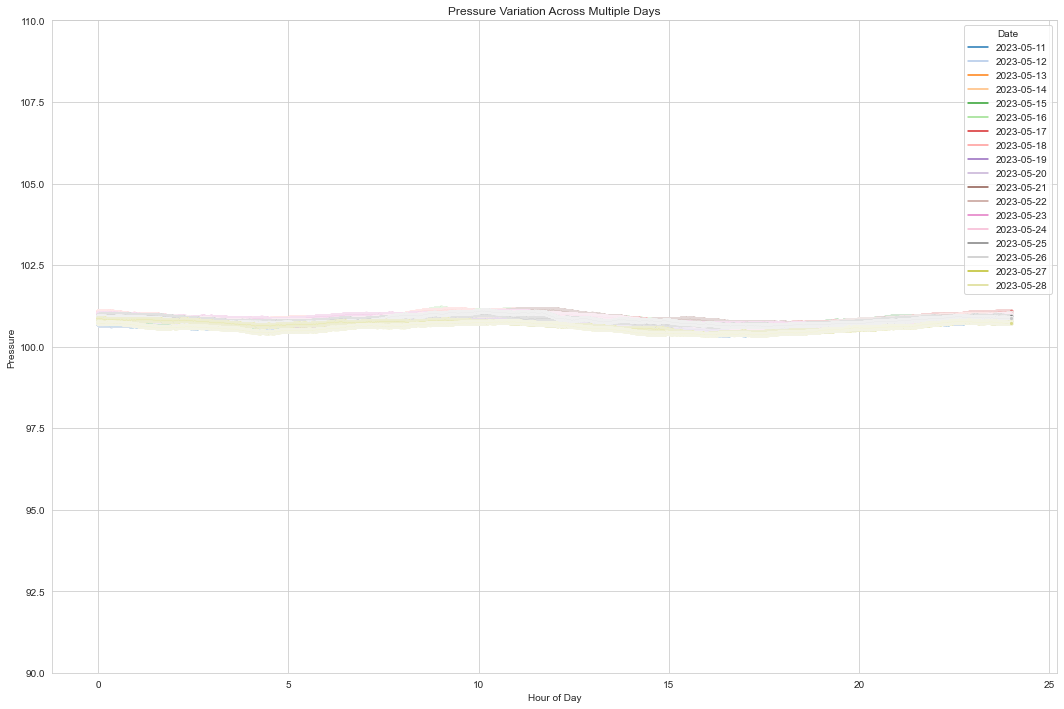

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



df['date'] = df['datetime'].dt.date

sns.set_style("whitegrid")

plt.figure(figsize=(18, 12))

sns.lineplot(data=df, x=df['datetime'].dt.hour + df['datetime'].dt.minute / 60 + df['datetime'].dt.second / 3600,
             y=df[19], hue='date', palette='tab20', alpha=0.4, marker='o', markersize=4, linewidth=0.7)

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Pressure Variation Across Multiple Days')
plt.grid(True)
plt.legend(title='Date', bbox_to_anchor=(1, 1))
plt.ylim(90, 110)  # 设置y轴刻度范围
plt.show()


In [9]:
df

,0,1,2,3,10,11,18,19,20,21,...,58,59,60,61,62,63,64,65,datetime,date
0,tick,185628,unix_time,1683763200,Day_of_Week,Thursday,Pressure,100.69,kPa,BARO_Temperature,...,uT,magnetometer_y,2.84,uT,magnetometer_z,2.17,uT,NaN,2023-05-11 00:00:00,2023-05-11
1,tick,185629,unix_time,1683763201,Day_of_Week,Thursday,Pressure,100.69,kPa,BARO_Temperature,...,uT,magnetometer_y,3.19,uT,magnetometer_z,1.18,uT,NaN,2023-05-11 00:00:01,2023-05-11
2,tick,185630,unix_time,1683763202,Day_of_Week,Thursday,Pressure,100.68,kPa,BARO_Temperature,...,uT,magnetometer_y,2.88,uT,magnetometer_z,1.79,uT,NaN,2023-05-11 00:00:02,2023-05-11
3,tick,185631,unix_time,1683763204,Day_of_Week,Thursday,Pressure,100.68,kPa,BARO_Temperature,...,uT,magnetometer_y,2.60,uT,magnetometer_z,1.86,uT,NaN,2023-05-11 00:00:04,2023-05-11
4,tick,185632,unix_time,1683763205,Day_of_Week,Thursday,Pressure,100.69,kPa,BARO_Temperature,...,uT,magnetometer_y,2.97,uT,magnetometer_z,2.67,uT,NaN,2023-05-11 00:00:05,2023-05-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304613,tick,1490241,unix_time,1685318394,Day_of_Week,Sunday,Pressure,100.74,kPa,BARO_Temperature,...,uT,magnetometer_y,7.08,uT,magnetometer_z,6.01,uT,NaN,2023-05-28 23:59:54,2023-05-28
1304614,tick,1490242,unix_time,1685318395,Day_of_Week,Sunday,Pressure,100.73,kPa,BARO_Temperature,...,uT,magnetometer_y,6.70,uT,magnetometer_z,5.00,uT,NaN,2023-05-28 23:59:55,2023-05-28
1304615,tick,1490243,unix_time,1685318396,Day_of_Week,Sunday,Pressure,100.72,kPa,BARO_Temperature,...,uT,magnetometer_y,6.48,uT,magnetometer_z,3.98,uT,NaN,2023-05-28 23:59:56,2023-05-28
1304616,tick,1490244,unix_time,1685318398,Day_of_Week,Sunday,Pressure,100.73,kPa,BARO_Temperature,...,uT,magnetometer_y,6.58,uT,magnetometer_z,5.83,uT,NaN,2023-05-28 23:59:58,2023-05-28


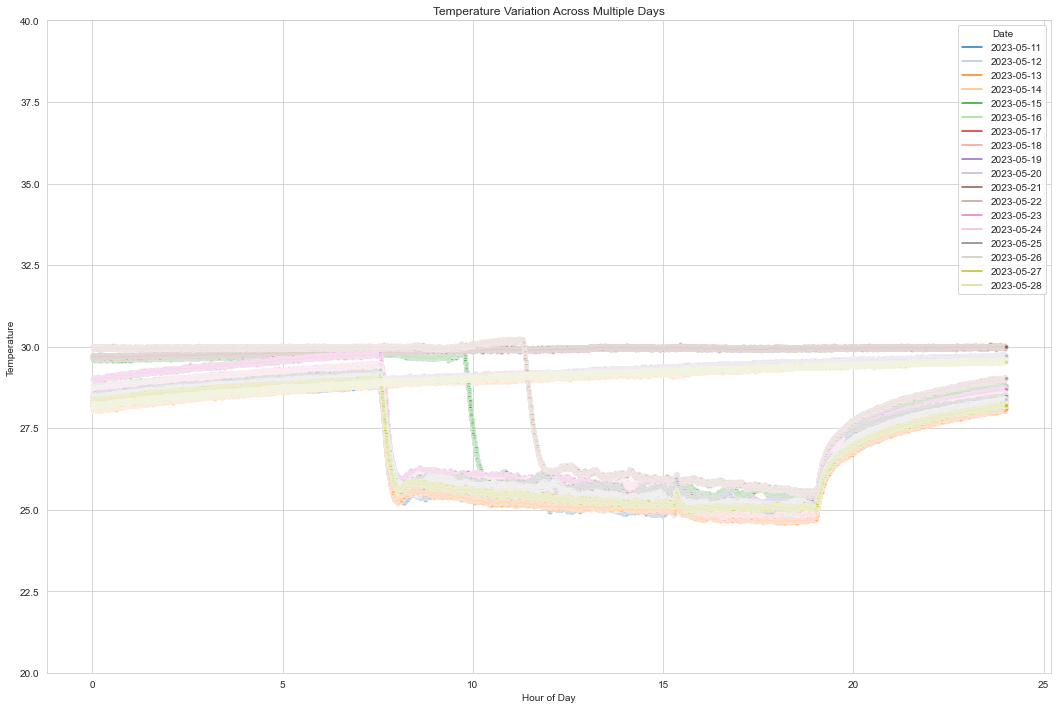

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd




df['date'] = df['datetime'].dt.date

sns.set_style("whitegrid")

plt.figure(figsize=(18, 12))

sns.lineplot(data=df, x=df['datetime'].dt.hour + df['datetime'].dt.minute / 60 + df['datetime'].dt.second / 3600,
             y=df[25], hue='date', palette='tab20', alpha=0.4, marker='o', markersize=4, linewidth=0.7)

plt.xlabel('Hour of Day')
plt.ylabel('Temperature')
plt.title('Temperature Variation Across Multiple Days')
plt.grid(True)
plt.legend(title='Date', bbox_to_anchor=(1, 1))
plt.ylim(20, 40) 
plt.show()


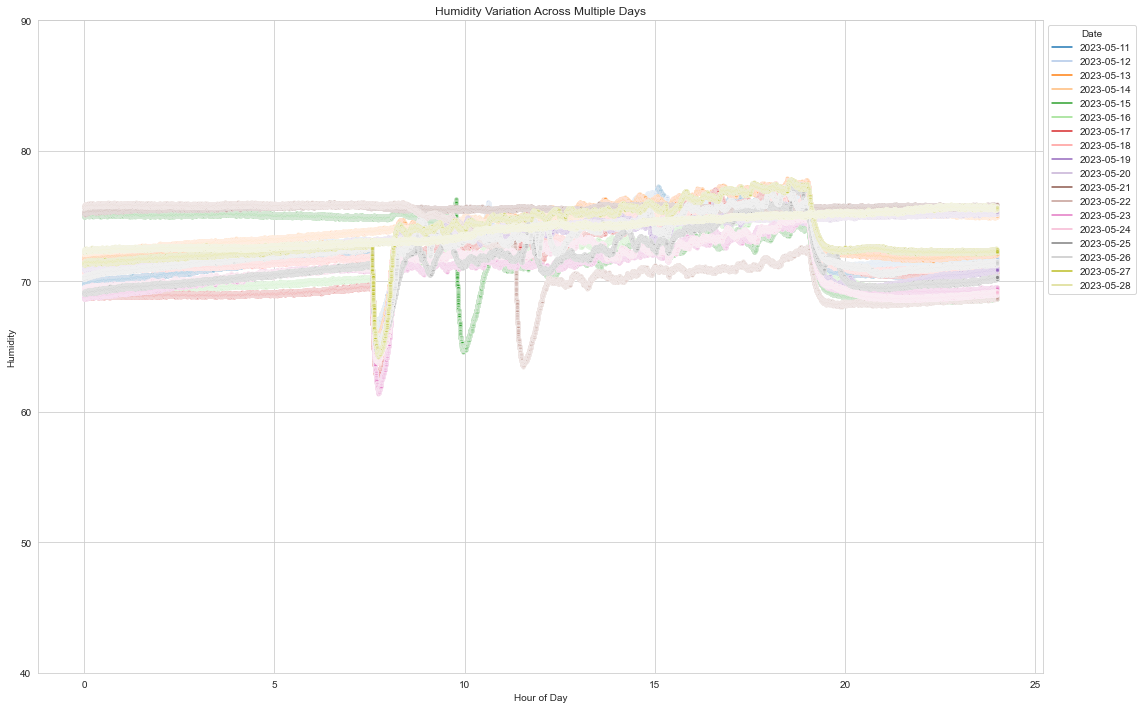

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df['date'] = df['datetime'].dt.date

sns.set_style("whitegrid")

plt.figure(figsize=(18, 12))

sns.lineplot(data=df, x=df['datetime'].dt.hour + df['datetime'].dt.minute / 60 + df['datetime'].dt.second / 3600,
             y=df[28], hue='date', palette='tab20', alpha=0.4, marker='o', markersize=4, linewidth=0.7)

plt.xlabel('Hour of Day')
plt.ylabel('Humidity')
plt.title('Humidity Variation Across Multiple Days')
plt.grid(True)
plt.legend(title='Date', bbox_to_anchor=(1, 1))
plt.ylim(40, 90)  
plt.show()


In [12]:

column_mapping = {
    1: 'tick',
    3: 'unix_time',
    11: 'Day_of_Week',
    19: 'Pressure',
    22: 'BARO_Temperature',
    25: 'Temperature',
    28: 'Humidity',
    31: 'APDS9960_proximity',
    33: 'APDS9960_red',
    35: 'APDS9960_green',
    37: 'APDS9960_blue',
    39: 'accel_x',
    42: 'accel_y',
    45: 'accel_z',
    48: 'gyro_x',
    51: 'gyro_y',
    54: 'gyro_z',
    57: 'magnetometer_x',
    60: 'magnetometer_y',
    63: 'magnetometer_z',
}

df.rename(columns=column_mapping, inplace=True)
columns_to_drop = [0,2,10,18,20,21,23,24,26,27,29,30,32,34,36,38,40,41,43,44,46,47,49,50,52,53,55,56,58,59,61,62,64,65]  

df.drop(columns=columns_to_drop, inplace=True)

In [13]:
df

,tick,unix_time,Day_of_Week,Pressure,BARO_Temperature,Temperature,Humidity,APDS9960_proximity,APDS9960_red,APDS9960_green,...,accel_y,accel_z,gyro_x,gyro_y,gyro_z,magnetometer_x,magnetometer_y,magnetometer_z,datetime,date
0,185628,1683763200,Thursday,100.69,28.08,28.21,69.85,250,0,0,...,-0.06,0.97,0.92,0.12,-0.67,41.83,2.84,2.17,2023-05-11 00:00:00,2023-05-11
1,185629,1683763201,Thursday,100.69,28.07,28.17,69.76,252,0,0,...,-0.06,0.97,1.10,0.31,-0.61,41.77,3.19,1.18,2023-05-11 00:00:01,2023-05-11
2,185630,1683763202,Thursday,100.68,28.08,28.19,69.92,252,0,0,...,-0.06,0.97,1.10,0.31,-0.55,41.11,2.88,1.79,2023-05-11 00:00:02,2023-05-11
3,185631,1683763204,Thursday,100.68,28.07,28.19,69.89,250,0,0,...,-0.06,0.97,0.92,-0.37,-1.04,42.00,2.60,1.86,2023-05-11 00:00:04,2023-05-11
4,185632,1683763205,Thursday,100.69,28.09,28.21,69.86,250,0,0,...,-0.06,0.97,0.79,-0.06,-0.49,41.28,2.97,2.67,2023-05-11 00:00:05,2023-05-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304613,1490241,1685318394,Sunday,100.74,29.26,29.57,75.63,253,0,0,...,-0.01,0.98,1.40,0.98,-0.67,41.98,7.08,6.01,2023-05-28 23:59:54,2023-05-28
1304614,1490242,1685318395,Sunday,100.73,29.27,29.53,75.70,253,0,0,...,-0.01,0.98,1.22,0.73,-0.67,41.98,6.70,5.00,2023-05-28 23:59:55,2023-05-28
1304615,1490243,1685318396,Sunday,100.72,29.26,29.57,75.64,251,0,0,...,-0.01,0.98,1.59,1.10,-0.55,41.88,6.48,3.98,2023-05-28 23:59:56,2023-05-28
1304616,1490244,1685318398,Sunday,100.73,29.27,29.53,75.58,251,0,0,...,-0.01,0.98,1.28,0.55,-0.49,42.02,6.58,5.83,2023-05-28 23:59:58,2023-05-28


In [14]:
sundays_data = df[df['datetime'].dt.day_name() == 'Sunday']

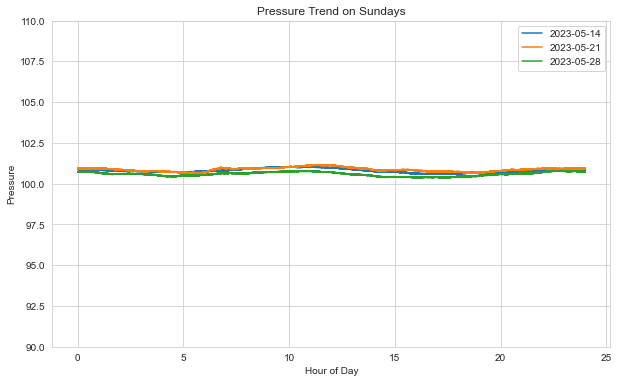

In [15]:
import matplotlib.pyplot as plt
import pandas as pd



df['datetime'] = pd.to_datetime(df['datetime'])

sundays_data = df[df['datetime'].dt.weekday == 6]  

plt.figure(figsize=(10, 6))

for date, group in sundays_data.groupby(sundays_data['datetime'].dt.date):
    plt.plot(group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600,
             group['Pressure'], label=date)

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Pressure Trend on Sundays')
plt.legend()
plt.grid(True)
plt.ylim(90, 110)  
plt.show()


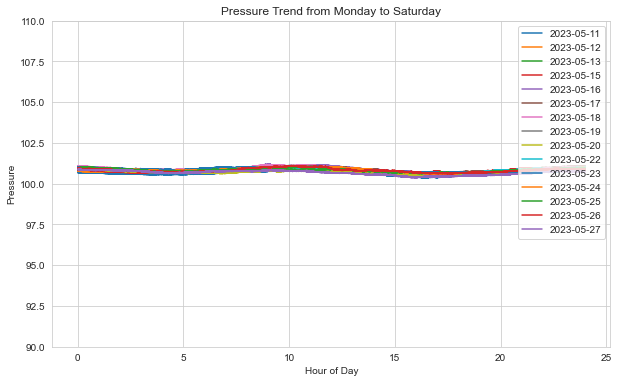

In [16]:
import matplotlib.pyplot as plt
import pandas as pd



df['datetime'] = pd.to_datetime(df['datetime'])

mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (df['datetime'].dt.dayofweek <= 5)]

plt.figure(figsize=(10, 6))

for date, group in mon_to_sat_data.groupby(mon_to_sat_data['datetime'].dt.date):
    plt.plot(group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600,
             group['Pressure'], label=date)

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Pressure Trend from Monday to Saturday')
plt.legend()
plt.grid(True)
plt.ylim(90, 110)  
plt.show()



In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (merged_data['datetime'].dt.dayofweek <= 5)]

tick_values = mon_to_sat_data['tick'].values.reshape(-1, 1)
pressure_values = mon_to_sat_data['Pressure'].values

models_parameters = {}

for n in range(1, 50):
    polynomial_features = PolynomialFeatures(degree=n)
    tick_poly = polynomial_features.fit_transform(tick_values)
    
    model = LinearRegression()
    model.fit(tick_poly, pressure_values)
    
    models_parameters[n] = {
        'coefficients': model.coef_,
        'intercept': model.intercept_
    }

for n, parameters in models_parameters.items():
    print(f"Degree {n} Polynomial:")
    print(f"Coefficients: {parameters['coefficients']}")
    print(f"Intercept: {parameters['intercept']}")
    print("=" * 40)


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score


cv_folds = 6

mse_scores_list = []
mae_scores_list = []
r2_scores_list = []

for n, parameters in models_parameters.items():
    polynomial_features = PolynomialFeatures(degree=n)
    tick_poly = polynomial_features.fit_transform(tick_values)
    
    model = LinearRegression()
    
    mse_scores = -cross_val_score(model, tick_poly, pressure_values, cv=cv_folds, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, tick_poly, pressure_values, cv=cv_folds, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, tick_poly, pressure_values, cv=cv_folds, scoring='r2')
    
    average_mse = np.mean(mse_scores)
    average_mae = np.mean(mae_scores)
    average_r2 = np.mean(r2_scores)
    
    mse_scores_list.append(average_mse)
    mae_scores_list.append(average_mae)
    r2_scores_list.append(average_r2)
    
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(models_parameters.keys(), mse_scores_list, marker='o')
plt.title('Average MSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average MSE')

plt.subplot(3, 1, 2)
plt.plot(models_parameters.keys(), mae_scores_list, marker='o', color='r')
plt.title('Average MAE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average MAE')

plt.subplot(3, 1, 3)
plt.plot(models_parameters.keys(), r2_scores_list, marker='o', color='g')
plt.title('Average R-squared vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average R-squared')

plt.tight_layout()
plt.show()


Temperature 

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (merged_data['datetime'].dt.dayofweek <= 5)]

tick_values = mon_to_sat_data['tick'].values.reshape(-1, 1)
pressure_values = mon_to_sat_data['Temperature'].values

models_parameters = {}

for n in range(1, 50):
    polynomial_features = PolynomialFeatures(degree=n)
    tick_poly = polynomial_features.fit_transform(tick_values)
    
    model = LinearRegression()
    model.fit(tick_poly, pressure_values)
    
    models_parameters[n] = {
        'coefficients': model.coef_,
        'intercept': model.intercept_
    }

for n, parameters in models_parameters.items():
    print(f"Degree {n} Polynomial:")
    print(f"Coefficients: {parameters['coefficients']}")
    print(f"Intercept: {parameters['intercept']}")
    print("=" * 40)


Degree 1 Polynomial:
Coefficients: [0.00000000e+00 2.51962891e-07]
Intercept: 27.088754161012012
Degree 2 Polynomial:
Coefficients: [ 0.00000000e+00  4.74660109e-06 -2.78860086e-12]
Intercept: 25.64882394760787
Degree 3 Polynomial:
Coefficients: [ 0.00000000e+00 -5.87521904e-06  1.24399824e-11 -6.37328812e-18]
Intercept: 27.671364298159304
Degree 4 Polynomial:
Coefficients: [ 0.00000000e+00 -2.23531713e-16  6.28905973e-13  3.08648481e-18
 -2.62998215e-24]
Intercept: 26.741384390745342
Degree 5 Polynomial:
Coefficients: [ 0.00000000e+00 -1.70056888e-20  1.70224210e-23  6.56417014e-18
 -7.11736737e-24  1.68539343e-30]
Intercept: 26.696183372408736
Degree 6 Polynomial:
Coefficients: [ 0.00000000e+00  2.14518849e-26  1.13434577e-33  3.30118281e-29
  1.24712637e-23 -1.72424184e-29  5.93089174e-36]
Intercept: 26.74000371431091
Degree 7 Polynomial:
Coefficients: [ 0.00000000e+00  1.00740040e-31  9.66704972e-40  7.59830523e-41
  4.41483507e-35  1.69628192e-29 -2.48808508e-35  9.10891911e-42]
I

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score


cv_folds = 6

mse_scores_list = []
mae_scores_list = []
r2_scores_list = []

for n, parameters in models_parameters.items():
    polynomial_features = PolynomialFeatures(degree=n)
    tick_poly = polynomial_features.fit_transform(tick_values)
    
    model = LinearRegression()
    
    mse_scores = -cross_val_score(model, tick_poly, pressure_values, cv=cv_folds, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, tick_poly, pressure_values, cv=cv_folds, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, tick_poly, pressure_values, cv=cv_folds, scoring='r2')
    
    average_mse = np.mean(mse_scores)
    average_mae = np.mean(mae_scores)
    average_r2 = np.mean(r2_scores)
    
    mse_scores_list.append(average_mse)
    mae_scores_list.append(average_mae)
    r2_scores_list.append(average_r2)
    
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(models_parameters.keys(), mse_scores_list, marker='o')
plt.title('Average MSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average MSE')

plt.subplot(3, 1, 2)
plt.plot(models_parameters.keys(), mae_scores_list, marker='o', color='r')
plt.title('Average MAE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average MAE')

plt.subplot(3, 1, 3)
plt.plot(models_parameters.keys(), r2_scores_list, marker='o', color='g')
plt.title('Average R-squared vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average R-squared')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (merged_data['datetime'].dt.dayofweek <= 5)]

tick_values = mon_to_sat_data['tick'].values.reshape(-1, 1)
pressure_values = mon_to_sat_data['Humidity'].values

models_parameters = {}

for n in range(1, 50):
    polynomial_features = PolynomialFeatures(degree=n)
    tick_poly = polynomial_features.fit_transform(tick_values)
    
    model = LinearRegression()
    model.fit(tick_poly, pressure_values)
    
    models_parameters[n] = {
        'coefficients': model.coef_,
        'intercept': model.intercept_
    }

for n, parameters in models_parameters.items():
    print(f"Degree {n} Polynomial:")
    print(f"Coefficients: {parameters['coefficients']}")
    print(f"Intercept: {parameters['intercept']}")
    print("=" * 40)


Degree 1 Polynomial:
Coefficients: [ 0.00000000e+00 -6.55056075e-07]
Intercept: 72.94918530804964
Degree 2 Polynomial:
Coefficients: [ 0.00000000e+00 -4.76133770e-06  2.54765344e-12]
Intercept: 74.26469919650054
Degree 3 Polynomial:
Coefficients: [ 0.00000000e+00  1.01576494e-05 -1.88416990e-11  8.95297993e-18]
Intercept: 71.42269269541164
Degree 4 Polynomial:
Coefficients: [ 0.00000000e+00 -2.60635583e-15  7.33297626e-12 -1.68492270e-17
  8.53844676e-24]
Intercept: 72.6359043285293
Degree 5 Polynomial:
Coefficients: [ 0.00000000e+00 -2.02566202e-20  2.02765511e-23  7.81902474e-18
 -1.77107655e-23  8.88345912e-30]
Intercept: 72.70757612177913
Degree 6 Polynomial:
Coefficients: [ 0.00000000e+00  1.52209100e-26  8.04860500e-34  2.34231194e-29
  8.84882532e-24 -1.88706882e-29  9.16702257e-36]
Intercept: 72.6760908785956
Degree 7 Polynomial:
Coefficients: [ 0.00000000e+00  4.91395484e-32  4.71544835e-40  3.70635915e-41
  2.15349330e-35  8.27422015e-30 -1.72689995e-35  8.27909897e-42]
Inter

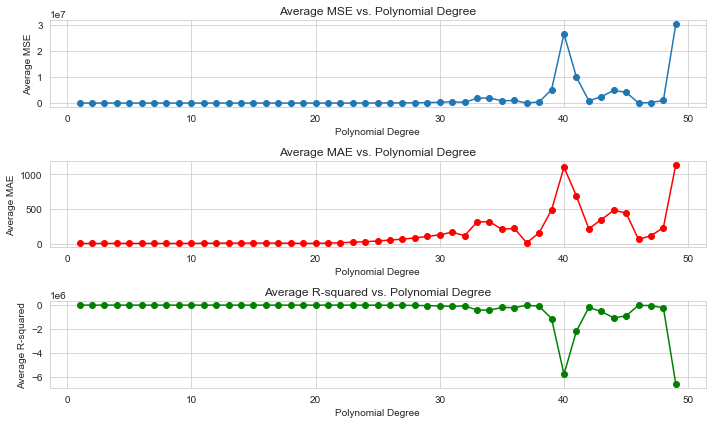

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score


cv_folds = 6

mse_scores_list = []
mae_scores_list = []
r2_scores_list = []

for n, parameters in models_parameters.items():
    polynomial_features = PolynomialFeatures(degree=n)
    tick_poly = polynomial_features.fit_transform(tick_values)
    
    model = LinearRegression()
    
    mse_scores = -cross_val_score(model, tick_poly, pressure_values, cv=cv_folds, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, tick_poly, pressure_values, cv=cv_folds, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, tick_poly, pressure_values, cv=cv_folds, scoring='r2')
    
    average_mse = np.mean(mse_scores)
    average_mae = np.mean(mae_scores)
    average_r2 = np.mean(r2_scores)
    
    mse_scores_list.append(average_mse)
    mae_scores_list.append(average_mae)
    r2_scores_list.append(average_r2)
    
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(models_parameters.keys(), mse_scores_list, marker='o')
plt.title('Average MSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average MSE')

plt.subplot(3, 1, 2)
plt.plot(models_parameters.keys(), mae_scores_list, marker='o', color='r')
plt.title('Average MAE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average MAE')

plt.subplot(3, 1, 3)
plt.plot(models_parameters.keys(), r2_scores_list, marker='o', color='g')
plt.title('Average R-squared vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average R-squared')

plt.tight_layout()
plt.show()


In [51]:
# 所有variables
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (merged_data['datetime'].dt.dayofweek <= 5)]

tick_values = mon_to_sat_data['tick'].values.reshape(-1, 1)
pressure_values = mon_to_sat_data['BARO_Temperature'].values

models_parameters = {}

for n in range(1, 50):
    polynomial_features = PolynomialFeatures(degree=n)
    tick_poly = polynomial_features.fit_transform(tick_values)
    
    model = LinearRegression()
    model.fit(tick_poly, pressure_values)
    
    models_parameters[n] = {
        'coefficients': model.coef_,
        'intercept': model.intercept_
    }

for n, parameters in models_parameters.items():
    print(f"Degree {n} Polynomial:")
    print(f"Coefficients: {parameters['coefficients']}")
    print(f"Intercept: {parameters['intercept']}")
    print("=" * 40)


Degree 1 Polynomial:
Coefficients: [0.00000000e+00 1.15069212e-07]
Intercept: 26.98141169052602
Degree 2 Polynomial:
Coefficients: [ 0.00000000e+00  4.43613668e-06 -2.68091266e-12]
Intercept: 25.59708767479831
Degree 3 Polynomial:
Coefficients: [ 0.00000000e+00 -6.23814367e-06  1.26228637e-11 -6.40517788e-18]
Intercept: 27.62999046680954
Degree 4 Polynomial:
Coefficients: [ 0.00000000e+00 -3.98580538e-18  1.12140545e-14  3.75586160e-18
 -2.84167379e-24]
Intercept: 26.64709187147752
Degree 5 Polynomial:
Coefficients: [ 0.00000000e+00 -1.46194199e-20  1.46338042e-23  5.64307394e-18
 -5.91824120e-24  1.26760675e-30]
Intercept: 26.577474529880618
Degree 6 Polynomial:
Coefficients: [ 0.00000000e+00  1.94144541e-26  1.02660927e-33  2.98764711e-29
  1.12867833e-23 -1.55935906e-29  5.33657670e-36]
Intercept: 26.605672957562074
Degree 7 Polynomial:
Coefficients: [ 0.00000000e+00  9.28653008e-32  8.91138693e-40  7.00428730e-41
  4.06973221e-35  1.56368540e-29 -2.29845423e-35  8.41679629e-42]
Int

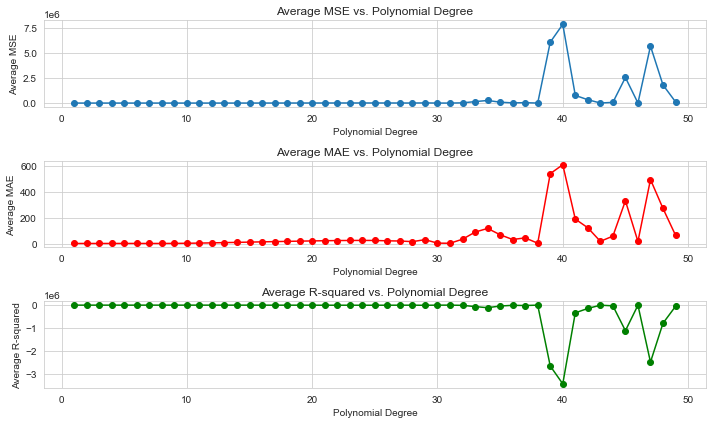

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score


cv_folds = 6

mse_scores_list = []
mae_scores_list = []
r2_scores_list = []

for n, parameters in models_parameters.items():
    polynomial_features = PolynomialFeatures(degree=n)
    tick_poly = polynomial_features.fit_transform(tick_values)
    
    model = LinearRegression()
    
    mse_scores = -cross_val_score(model, tick_poly, pressure_values, cv=cv_folds, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, tick_poly, pressure_values, cv=cv_folds, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, tick_poly, pressure_values, cv=cv_folds, scoring='r2')
    
    average_mse = np.mean(mse_scores)
    average_mae = np.mean(mae_scores)
    average_r2 = np.mean(r2_scores)
    
    mse_scores_list.append(average_mse)
    mae_scores_list.append(average_mae)
    r2_scores_list.append(average_r2)
    
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(models_parameters.keys(), mse_scores_list, marker='o')
plt.title('Average MSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average MSE')

plt.subplot(3, 1, 2)
plt.plot(models_parameters.keys(), mae_scores_list, marker='o', color='r')
plt.title('Average MAE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average MAE')

plt.subplot(3, 1, 3)
plt.plot(models_parameters.keys(), r2_scores_list, marker='o', color='g')
plt.title('Average R-squared vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average R-squared')

plt.tight_layout()
plt.show()


In [ ]:
# 選五個模型畫圖

In [53]:
mon_to_sat_data

,tick,unix_time,Day_of_Week,Pressure,BARO_Temperature,Temperature,Humidity,APDS9960_proximity,APDS9960_red,APDS9960_green,...,accel_y,accel_z,gyro_x,gyro_y,gyro_z,magnetometer_x,magnetometer_y,magnetometer_z,datetime,date
0,185628,1683763200,Thursday,100.69,28.08,28.21,69.85,250,0,0,...,-0.06,0.97,0.92,0.12,-0.67,41.83,2.84,2.17,2023-05-11 00:00:00,2023-05-11
1,185629,1683763201,Thursday,100.69,28.07,28.17,69.76,252,0,0,...,-0.06,0.97,1.10,0.31,-0.61,41.77,3.19,1.18,2023-05-11 00:00:01,2023-05-11
2,185630,1683763202,Thursday,100.68,28.08,28.19,69.92,252,0,0,...,-0.06,0.97,1.10,0.31,-0.55,41.11,2.88,1.79,2023-05-11 00:00:02,2023-05-11
3,185631,1683763204,Thursday,100.68,28.07,28.19,69.89,250,0,0,...,-0.06,0.97,0.92,-0.37,-1.04,42.00,2.60,1.86,2023-05-11 00:00:04,2023-05-11
4,185632,1683763205,Thursday,100.69,28.09,28.21,69.86,250,0,0,...,-0.06,0.97,0.79,-0.06,-0.49,41.28,2.97,2.67,2023-05-11 00:00:05,2023-05-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232572,1418200,1685231994,Saturday,100.74,27.93,28.22,72.28,250,0,0,...,-0.01,0.98,1.04,0.24,-0.55,42.41,6.13,5.54,2023-05-27 23:59:54,2023-05-27
1232573,1418201,1685231995,Saturday,100.75,27.92,28.21,72.31,252,0,0,...,-0.01,0.98,1.10,-0.18,-0.92,42.26,5.83,5.20,2023-05-27 23:59:55,2023-05-27
1232574,1418202,1685231997,Saturday,100.75,27.93,28.21,72.28,252,0,0,...,-0.01,0.98,0.92,0.00,-0.61,42.14,5.58,4.71,2023-05-27 23:59:57,2023-05-27
1232575,1418203,1685231998,Saturday,100.74,27.92,28.19,72.46,251,0,0,...,-0.01,0.98,0.61,-0.24,-0.98,42.99,5.48,5.85,2023-05-27 23:59:58,2023-05-27


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (merged_data['datetime'].dt.dayofweek <= 5)]

tick_values = mon_to_sat_data['tick'].values.reshape(-1, 1)
pressure_values = mon_to_sat_data['Pressure'].values

models_parameters_pressure = {}

for n in range(1, 50):
    polynomial_features = PolynomialFeatures(degree=n)
    tick_poly = polynomial_features.fit_transform(tick_values)
    
    model = LinearRegression()
    model.fit(tick_poly, pressure_values)
    
    models_parameters_pressure[n] = {
        'coefficients': model.coef_,
        'intercept': model.intercept_
    }

for n, parameters in models_parameters_pressure.items():
    print(f"Degree {n} Polynomial:")
    print(f"Coefficients: {parameters['coefficients']}")
    print(f"Intercept: {parameters['intercept']}")
    print("=" * 40)


Degree 1 Polynomial:
Coefficients: [0.00000000e+00 5.77739466e-08]
Intercept: 100.75348200434718
Degree 2 Polynomial:
Coefficients: [ 0.00000000e+00  8.13063043e-07 -4.68602751e-13]
Intercept: 100.51151289778092
Degree 3 Polynomial:
Coefficients: [ 0.00000000e+00  8.28611649e-07 -4.90846987e-13  9.26339390e-21]
Intercept: 100.50857118815709
Degree 4 Polynomial:
Coefficients: [ 0.00000000e+00 -3.11625658e-16  8.76758088e-13 -8.35376557e-19
  1.64101965e-25]
Intercept: 100.66016738559311
Degree 5 Polynomial:
Coefficients: [ 0.00000000e+00 -2.22590639e-21  2.22809650e-24  8.59196498e-19
 -9.14180615e-25  2.11306071e-31]
Intercept: 100.71604631381591
Degree 6 Polynomial:
Coefficients: [ 0.00000000e+00  1.22171213e-27  6.46024344e-35  1.88006560e-30
  7.10254332e-25 -7.49516167e-31  1.64056979e-37]
Intercept: 100.74615227509062
Degree 7 Polynomial:
Coefficients: [ 0.00000000e+00  2.98648062e-33  2.86583730e-41  2.25254824e-42
  1.30879632e-36  5.02869866e-31 -4.83984278e-37  7.93604083e-44]

In [65]:
cv_folds = 6

mse_scores_dict = {}

for n, parameters in models_parameters_pressure.items():
    polynomial_features = PolynomialFeatures(degree=n)
    tick_poly = polynomial_features.fit_transform(tick_values)
    
    model = LinearRegression()
    
    mse_scores = -cross_val_score(model, tick_poly, pressure_values, cv=cv_folds, scoring='neg_mean_squared_error')
    average_mse = np.mean(mse_scores)
    
    mse_scores_dict[n] = average_mse

best_degrees_pressure = sorted(mse_scores_dict, key=lambda x: mse_scores_dict[x])[:5]


Best degrees (MSE): [2, 1, 3, 4, 11]
Best degrees (RMSE): [2, 1, 3, 4, 11]


In [66]:
best_degrees_pressure

[2, 1, 3, 4, 11]

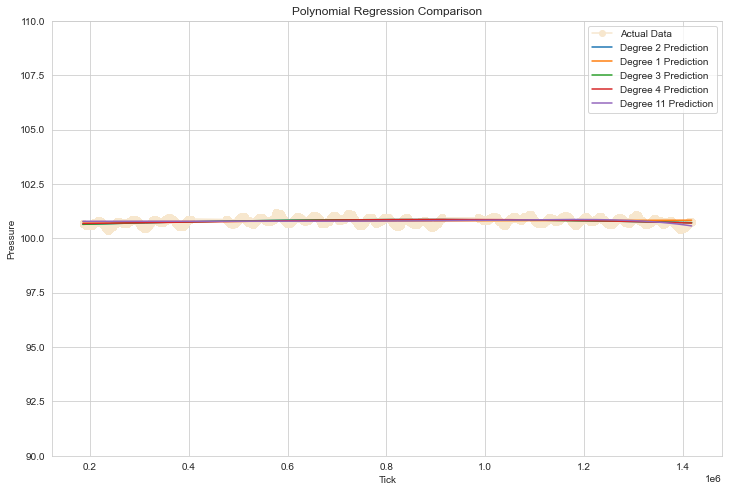

In [64]:
plt.figure(figsize=(12, 8))
plt.plot(tick_values, pressure_values, label='Actual Data', marker='o',  color = '#f7e7ce')

for degree in best_degrees_pressure:
    polynomial_features = PolynomialFeatures(degree=degree)
    tick_poly = polynomial_features.fit_transform(tick_values.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(tick_poly, pressure_values)
    predicted_pressures = model.predict(tick_poly)
    
    plt.plot(tick_values, predicted_pressures, label=f'Degree {degree} Prediction')
    plt.xlabel('Tick')
    plt.ylabel('Pressure')
    plt.ylim(90, 110) 
    plt.title('Polynomial Regression Comparison')
    plt.legend()

plt.show()
# 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


dates = np.unique(mon_to_sat_data['datetime'])
ticks = np.unique(mon_to_sat_data['tick'])
X, Y = np.meshgrid(dates, ticks)
Z = np.zeros_like(X)

for i, date in enumerate(dates):
    for j, tick in enumerate(ticks):
        daily_data = mon_to_sat_data[(mon_to_sat_data['datetime'] == date) & (mon_to_sat_data['tick'] == tick)]
        if len(daily_data) > 0:
            Z[j, i] = daily_data['Pressure'].values[0]  

# 
coefficients = np.polyfit(np.ravel(X), np.ravel(Y), Z, degree)
poly_function = np.poly1d(coefficients)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, label='Pressure Data')
ax.plot_surface(X, Y, poly_function(np.ravel(X), np.ravel(Y)).reshape(X.shape), color='b', alpha=0.5, label='Fitted Surface')
ax.set_xlabel('Date')
ax.set_ylabel('Tick')
ax.set_zlabel('Pressure')
ax.set_title('Polynomial Fit for Pressure Data')
ax.legend()
plt.show()


MemoryError: Unable to allocate 8.61 TiB for an array with shape (1087821, 1087821) and data type datetime64[ns]

# Temperature

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (merged_data['datetime'].dt.dayofweek <= 5)]
# temperature
tick_values = mon_to_sat_data['tick'].values.reshape(-1, 1)
temperature_values = mon_to_sat_data['Temperature'].values

models_parameters_temperature = {}

for n in range(1, 50):
    polynomial_features = PolynomialFeatures(degree=n)
    tick_poly = polynomial_features.fit_transform(tick_values)
    
    model = LinearRegression()
    model.fit(tick_poly, temperature_values)
    
    models_parameters_temperature[n] = {
        'coefficients': model.coef_,
        'intercept': model.intercept_
    }

for n, parameters in models_parameters_temperature.items():
    print(f"Degree {n} Polynomial:")
    print(f"Coefficients: {parameters['coefficients']}")
    print(f"Intercept: {parameters['intercept']}")
    print("=" * 40)


Degree 1 Polynomial:
Coefficients: [0.00000000e+00 2.51962891e-07]
Intercept: 27.088754161012012
Degree 2 Polynomial:
Coefficients: [ 0.00000000e+00  4.74660109e-06 -2.78860086e-12]
Intercept: 25.64882394760787
Degree 3 Polynomial:
Coefficients: [ 0.00000000e+00 -5.87521904e-06  1.24399824e-11 -6.37328812e-18]
Intercept: 27.671364298159304
Degree 4 Polynomial:
Coefficients: [ 0.00000000e+00 -2.23531713e-16  6.28905973e-13  3.08648481e-18
 -2.62998215e-24]
Intercept: 26.741384390745342
Degree 5 Polynomial:
Coefficients: [ 0.00000000e+00 -1.70056888e-20  1.70224210e-23  6.56417014e-18
 -7.11736737e-24  1.68539343e-30]
Intercept: 26.696183372408736
Degree 6 Polynomial:
Coefficients: [ 0.00000000e+00  2.14518849e-26  1.13434577e-33  3.30118281e-29
  1.24712637e-23 -1.72424184e-29  5.93089174e-36]
Intercept: 26.74000371431091
Degree 7 Polynomial:
Coefficients: [ 0.00000000e+00  1.00740040e-31  9.66704972e-40  7.59830523e-41
  4.41483507e-35  1.69628192e-29 -2.48808508e-35  9.10891911e-42]
I

In [68]:
cv_folds = 6

mse_scores_dict = {}

for n, parameters in models_parameters_temperature.items():
    polynomial_features = PolynomialFeatures(degree=n)
    tick_poly = polynomial_features.fit_transform(tick_values)
    
    model = LinearRegression()
    
    mse_scores = -cross_val_score(model, tick_poly, temperature_values, cv=cv_folds, scoring='neg_mean_squared_error')
    average_mse = np.mean(mse_scores)
    
    mse_scores_dict[n] = average_mse

best_degrees_temperature = sorted(mse_scores_dict, key=lambda x: mse_scores_dict[x])[:5]





In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

cv_folds = 6

mse_scores_dict = {}
r2_scores_dict = {}
mae_scores_dict = {}
rmse_scores_dict = {}

for n, parameters in models_parameters_temperature.items():
    polynomial_features = PolynomialFeatures(degree=n)
    tick_poly = polynomial_features.fit_transform(tick_values)
    
    model = LinearRegression()
    
    mse_scores = -cross_val_score(model, tick_poly, temperature_values, cv=cv_folds, scoring='neg_mean_squared_error')
    average_mse = np.mean(mse_scores)
    mse_scores_dict[n] = average_mse
    
    model.fit(tick_poly, temperature_values)
    predicted_temperature = model.predict(tick_poly)
    
    r2 = r2_score(temperature_values, predicted_temperature)
    r2_scores_dict[n] = r2
    
    mae = mean_absolute_error(temperature_values, predicted_temperature)
    mae_scores_dict[n] = mae
    
    rmse = np.sqrt(mean_squared_error(temperature_values, predicted_temperature))
    rmse_scores_dict[n] = rmse

best_degrees_mse = sorted(mse_scores_dict, key=lambda x: mse_scores_dict[x])[:5]
best_degrees_r2 = sorted(r2_scores_dict, key=lambda x: r2_scores_dict[x], reverse=True)[:5]
best_degrees_mae = sorted(mae_scores_dict, key=lambda x: mae_scores_dict[x])[:5]
best_degrees_rmse = sorted(rmse_scores_dict, key=lambda x: rmse_scores_dict[x])[:5]

print("Best Degrees based on MSE:")
print(best_degrees_mse)
print("=" * 40)
print("Best Degrees based on R^2:")
print(best_degrees_r2)
print("=" * 40)
print("Best Degrees based on MAE:")
print(best_degrees_mae)
print("=" * 40)
print("Best Degrees based on RMSE:")
print(best_degrees_rmse)
print("=" * 40)

# Rest of the plotting code remains unchanged



Best Degrees based on MSE:
[3, 1, 2, 7, 8]
Best Degrees based on R^2:
[8, 7, 9, 6, 3]
Best Degrees based on MAE:
[8, 7, 9, 6, 3]
Best Degrees based on RMSE:
[8, 7, 9, 6, 3]


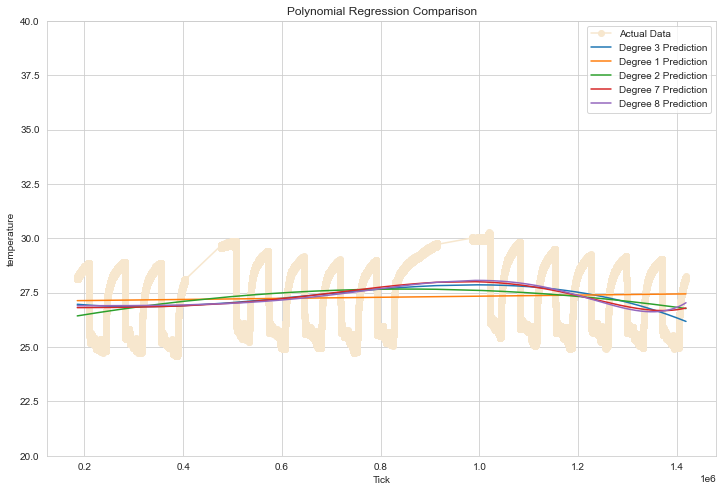

In [71]:
plt.figure(figsize=(12, 8))
plt.plot(tick_values, temperature_values, label='Actual Data', marker='o',  color = '#f7e7ce')

for degree in best_degrees_temperature:
    polynomial_features = PolynomialFeatures(degree=degree)
    tick_poly = polynomial_features.fit_transform(tick_values.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(tick_poly, temperature_values)
    predicted_temperature = model.predict(tick_poly)
    
    plt.plot(tick_values, predicted_temperature, label=f'Degree {degree} Prediction')
    plt.xlabel('Tick')
    plt.ylabel('temperature')
    plt.ylim(20, 40) 
    plt.title('Polynomial Regression Comparison')
    plt.legend()

plt.show()
# 

# Humidity

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (merged_data['datetime'].dt.dayofweek <= 5)]
# humidity
tick_values = mon_to_sat_data['tick'].values.reshape(-1, 1)
humidity_values = mon_to_sat_data['Humidity'].values

models_parameters_humidity = {}

for n in range(1, 50):
    polynomial_features = PolynomialFeatures(degree=n)
    tick_poly = polynomial_features.fit_transform(tick_values)
    
    model = LinearRegression()
    model.fit(tick_poly, humidity_values)
    
    models_parameters_humidity[n] = {
        'coefficients': model.coef_,
        'intercept': model.intercept_
    }

for n, parameters in models_parameters_humidity.items():
    print(f"Degree {n} Polynomial:")
    print(f"Coefficients: {parameters['coefficients']}")
    print(f"Intercept: {parameters['intercept']}")
    print("=" * 40)


Degree 1 Polynomial:
Coefficients: [ 0.00000000e+00 -6.55056075e-07]
Intercept: 72.94918530804964
Degree 2 Polynomial:
Coefficients: [ 0.00000000e+00 -4.76133770e-06  2.54765344e-12]
Intercept: 74.26469919650054
Degree 3 Polynomial:
Coefficients: [ 0.00000000e+00  1.01576494e-05 -1.88416990e-11  8.95297993e-18]
Intercept: 71.42269269541164
Degree 4 Polynomial:
Coefficients: [ 0.00000000e+00 -2.60635583e-15  7.33297626e-12 -1.68492270e-17
  8.53844676e-24]
Intercept: 72.6359043285293
Degree 5 Polynomial:
Coefficients: [ 0.00000000e+00 -2.02566202e-20  2.02765511e-23  7.81902474e-18
 -1.77107655e-23  8.88345912e-30]
Intercept: 72.70757612177913
Degree 6 Polynomial:
Coefficients: [ 0.00000000e+00  1.52209100e-26  8.04860500e-34  2.34231194e-29
  8.84882532e-24 -1.88706882e-29  9.16702257e-36]
Intercept: 72.6760908785956
Degree 7 Polynomial:
Coefficients: [ 0.00000000e+00  4.91395484e-32  4.71544835e-40  3.70635915e-41
  2.15349330e-35  8.27422015e-30 -1.72689995e-35  8.27909897e-42]
Inter

In [74]:
cv_folds = 6

mse_scores_dict = {}

for n, parameters in models_parameters_humidity.items():
    polynomial_features = PolynomialFeatures(degree=n)
    tick_poly = polynomial_features.fit_transform(tick_values)
    
    model = LinearRegression()
    
    mse_scores = -cross_val_score(model, tick_poly, humidity_values, cv=cv_folds, scoring='neg_mean_squared_error')
    average_mse = np.mean(mse_scores)
    
    mse_scores_dict[n] = average_mse

best_degrees_humidity = sorted(mse_scores_dict, key=lambda x: mse_scores_dict[x])[:5]


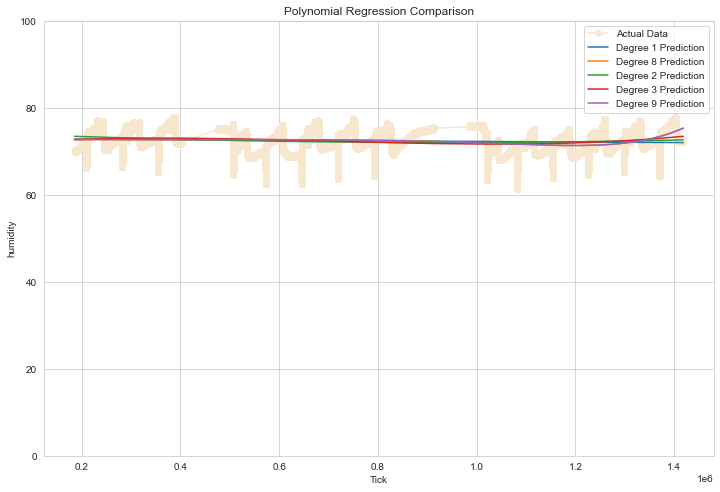

In [75]:
plt.figure(figsize=(12, 8))
plt.plot(tick_values, humidity_values, label='Actual Data', marker='o',  color = '#f7e7ce')

for degree in best_degrees_humidity:
    polynomial_features = PolynomialFeatures(degree=degree)
    tick_poly = polynomial_features.fit_transform(tick_values.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(tick_poly, humidity_values)
    predicted_humidity = model.predict(tick_poly)
    
    plt.plot(tick_values, predicted_humidity, label=f'Degree {degree} Prediction')
    plt.xlabel('Tick')
    plt.ylabel('humidity')
    plt.ylim(0, 100) 
    plt.title('Polynomial Regression Comparison')
    plt.legend()

plt.show()
# 